# Faults in a urban waste water treatment plant

## Source Information:  
   -- Creators: Manel Poch (igte2@cc.uab.es)  
         Unitat d'Enginyeria Quimica  
         Universitat Autonoma de Barcelona. Bellaterra. Barcelona; Spain  
   -- Donor: Javier Bejar and Ulises Cortes (bejar@lsi.upc.es)  
         Dept. Llenguatges i Sistemes Informatics;  
         Universitat Politecnica de Catalunya. Barcelona; Spain  
   -- Date: June, 1993  

## Data Set Information:
This dataset comes from the daily measures of sensors in a urban waste  
water treatment plant. The objective is to classify the operational  
state of the plant in order to predict faults through the state  
variables of the plant at each of the stages of the treatment process.  
This domain has been stated as an ill-structured domain.  

 ## Attribute Information:
 All atrributes are numeric and continuous  

N.  Attrib.  
 1  Q-E        (input flow to plant)  
 2  ZN-E       (input Zinc to plant)  
 3  PH-E       (input pH to plant)  
 4  DBO-E      (input Biological demand of oxygen to plant)  
 5  DQO-E      (input chemical demand of oxygen to plant)  
 6  SS-E       (input suspended solids to plant)  
 7  SSV-E      (input volatile supended solids to plant)  
 8  SED-E      (input sediments to plant)  
 9  COND-E     (input conductivity to plant)  
10  PH-P       (input pH to primary settler)  
11  DBO-P      (input Biological demand of oxygen to primary settler)  
12  SS-P       (input suspended solids to primary settler)  
13  SSV-P      (input volatile supended solids to primary settler)  
14  SED-P      (input sediments to primary settler)  
15  COND-P     (input conductivity to primary settler)  
16  PH-D       (input pH to secondary settler)  
17  DBO-D      (input Biological demand of oxygen to secondary settler)  
18  DQO-D      (input chemical demand of oxygen to secondary settler)  
19  SS-D       (input suspended solids to secondary settler)  
20  SSV-D      (input volatile supended solids to secondary settler)  
21  SED-D      (input sediments to secondary settler)  
22  COND-D     (input conductivity to secondary settler)  
23  PH-S       (output pH)  
24  DBO-S      (output Biological demand of oxygen)  
25  DQO-S      (output chemical demand of oxygen)  
26  SS-S       (output suspended solids)  
27  SSV-S      (output volatile supended solids)  
28  SED-S      (output sediments)  
29  COND-S     (output conductivity)  
30  RD-DBO-P   (performance input Biological demand of oxygen in primary settler)  
31  RD-SS-P    (performance input suspended solids to primary settler)  
32  RD-SED-P   (performance input sediments to primary settler)  
33  RD-DBO-S   (performance input Biological demand of oxygen to secondary settler)  
34  RD-DQO-S   (performance input chemical demand of oxygen to secondary settler)  
35  RD-DBO-G   (global performance input Biological demand of oxygen)  
36  RD-DQO-G   (global performance input chemical demand of oxygen)  
37  RD-SS-G    (global performance input suspended solids)  
38  RD-SED-G   (global performance input sediments)  

## Citation:  
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science. 
Dataset link https://archive.ics.uci.edu/ml/datasets/water+treatment+plant


In [113]:
# Clustering

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os.path
import seaborn as sns
import numpy as np

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = ".."

IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "reports", "figures")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300, grid_lines=False, transparent_=True, naming_prefix='wtp'):
    """Save a plot as an image to a folder.

    Args:
        fig_id (string): file name of the plot
        tight_layout (bool, optional): Defaults to True.
        fig_extension (str, optional): Defaults to "png".
        resolution (int, optional): Defaults to 300.
        grid_lines (bool, optional): Show grid lines. Defaults to False.
    """
     
    plt.rcParams['axes.grid'] = grid_lines
    path = os.path.join(IMAGES_PATH, naming_prefix + "_" + fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution, transparent=transparent_)


In [114]:
dataset = pd.read_csv("../data/raw/water-treatment.data.csv", header=None,na_values="?" )

In [115]:
dataset

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,D-1/3/90,44101.0,1.50,7.8,NaN,407.0,166.0,66.3,4.5,2110,...,2000.0,NaN,58.8,95.5,NaN,70.0,NaN,79.4,87.3,99.6
1,D-2/3/90,39024.0,3.00,7.7,NaN,443.0,214.0,69.2,6.5,2660,...,2590.0,NaN,60.7,94.8,NaN,80.8,NaN,79.5,92.1,100.0
2,D-4/3/90,32229.0,5.00,7.6,NaN,528.0,186.0,69.9,3.4,1666,...,1888.0,NaN,58.2,95.6,NaN,52.9,NaN,75.8,88.7,98.5
3,D-5/3/90,35023.0,3.50,7.9,205.0,588.0,192.0,65.6,4.5,2430,...,1840.0,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100.0
4,D-6/3/90,36924.0,1.50,8.0,242.0,496.0,176.0,64.8,4.0,2110,...,2120.0,NaN,62.7,95.6,NaN,71.0,92.1,78.2,87.5,99.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,D-26/8/91,32723.0,0.16,7.7,93.0,252.0,176.0,56.8,2.3,894,...,942.0,NaN,62.3,93.3,69.8,75.9,79.6,78.6,96.6,99.6
523,D-27/8/91,33535.0,0.32,7.8,192.0,346.0,172.0,68.6,4.0,988,...,950.0,NaN,58.3,97.8,83.0,59.1,91.1,74.6,90.7,100.0
524,D-28/8/91,32922.0,0.30,7.4,139.0,367.0,180.0,64.4,3.0,1060,...,1136.0,NaN,65.0,97.1,76.2,66.4,82.0,77.1,88.9,99.0
525,D-29/8/91,32190.0,0.30,7.3,200.0,545.0,258.0,65.1,4.0,1260,...,1326.0,39.8,65.9,97.1,81.7,70.9,89.5,87.0,89.5,99.8


In [116]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       527 non-null    object 
 1   1       509 non-null    float64
 2   2       524 non-null    float64
 3   3       527 non-null    float64
 4   4       504 non-null    float64
 5   5       521 non-null    float64
 6   6       526 non-null    float64
 7   7       516 non-null    float64
 8   8       502 non-null    float64
 9   9       527 non-null    int64  
 10  10      527 non-null    float64
 11  11      487 non-null    float64
 12  12      527 non-null    int64  
 13  13      516 non-null    float64
 14  14      503 non-null    float64
 15  15      527 non-null    int64  
 16  16      527 non-null    float64
 17  17      499 non-null    float64
 18  18      518 non-null    float64
 19  19      525 non-null    float64
 20  20      514 non-null    float64
 21  21      502 non-null    float64
 22  22

In [117]:
dataset.isna().sum()

0      0
1     18
2      3
3      0
4     23
5      6
6      1
7     11
8     25
9      0
10     0
11    40
12     0
13    11
14    24
15     0
16     0
17    28
18     9
19     2
20    13
21    25
22     0
23     1
24    23
25    18
26     5
27    17
28    28
29     1
30    62
31     4
32    27
33    40
34    26
35    36
36    25
37     8
38    31
dtype: int64

In [118]:
dataset.describe().T.style.format('{0:,.1f}')

,count,mean,std,min,25%,50%,75%,max
1,509.0,"37,226.6","6,636.0","10,050.0","32,888.0","35,990.0","41,372.0","60,081.0"
2,524.0,2.4,2.7,0.1,0.9,1.5,3.0,33.5
3,527.0,7.8,0.2,6.9,7.6,7.8,8.0,8.7
4,504.0,188.7,62.1,31.0,146.8,182.5,223.0,438.0
5,521.0,406.9,120.4,81.0,325.0,400.0,478.0,941.0
6,526.0,227.4,135.9,98.0,170.0,196.0,242.0,"2,008.0"
7,516.0,61.4,12.4,13.2,55.7,64.3,69.7,85.0
8,502.0,4.6,2.7,0.4,3.1,4.5,5.5,36.0
9,527.0,"1,478.6",394.9,651.0,"1,201.0","1,406.0","1,672.0","3,230.0"
10,527.0,7.8,0.2,7.3,7.7,7.8,8.0,8.5


In [119]:
id_null_flow = dataset.loc[dataset[1].isnull(), :].index
id_null_flow

Int64Index([436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448,
            449, 450, 451, 452, 453],
           dtype='int64')

In [120]:
df = dataset.copy()

# Change column headings type to sting. String types required by Seaborn.
df.columns = dataset.columns.astype(str)


In [121]:
# Drop any nulls in the plant inflows columns. 
dataset.dropna(axis=0, how='any', subset=[1], inplace=True)

In [122]:
dataset.isna().sum()


0      0
1      0
2      3
3      0
4     23
5      6
6      1
7     11
8     25
9      0
10     0
11    40
12     0
13    11
14    24
15     0
16     0
17    28
18     7
19     2
20    13
21    25
22     0
23     1
24    23
25    18
26     5
27    17
28    28
29     1
30    62
31     4
32    27
33    40
34    24
35    36
36    25
37     8
38    31
dtype: int64

Saving figure correlation_heatmap_all_features


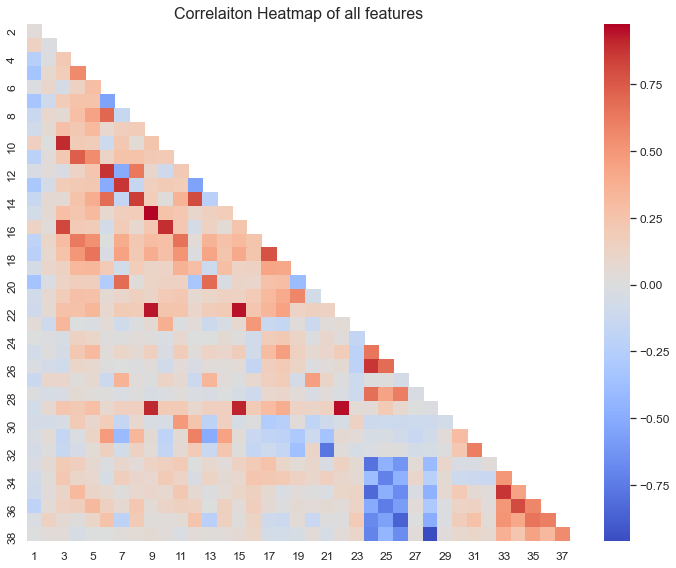

In [123]:
# Review if any potential correlations between attributes
corr_mat = df.corr()
mask = np.tril(np.ones_like(corr_mat, dtype = np.bool), k=-1)


plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat.where(mask).iloc[1:,:-1], annot=False, cmap = 'coolwarm')

plt.title('Correlaiton Heatmap of all features', fontsize=16)
save_fig('correlation_heatmap_all_features')
plt.show()

## Features

Reading from left to right on the x-axis, will go up to see what is strong or weak correlation to other attributes.

Will use these correlations as a basis to potential drop unnecessary attributes. 

- 1 Q-E has minimal correlation to all the others. But this is the main feature of the plant. 
- 2 ZN-E has minimal correlations also. Since Zn is not measured again I will drop it. 
- 3 PH-E has high correlation with 10 PH-P, 16 PH-D and 23 PH-S. The PH doesn't change much from the influent to the effluent. 
- 9 COND-E has high correlation with 15 COND-P, 22 COND-D and 29 COND-S. The conductivity is remains similar throughout the plant. 

In [124]:
# Assign feature data

# Select those features (columns) which may be useful 
x = np.r_[1, 4:9, 11:15, 17:22, 24:29]#, 30:39]

X = dataset.iloc[:, x].values
print(f"Attribute numbers to keep: {x}")

Attribute numbers to keep: [ 1  4  5  6  7  8 11 12 13 14 17 18 19 20 21 24 25 26 27 28]


Saving figure correlation_heatmap_select_features


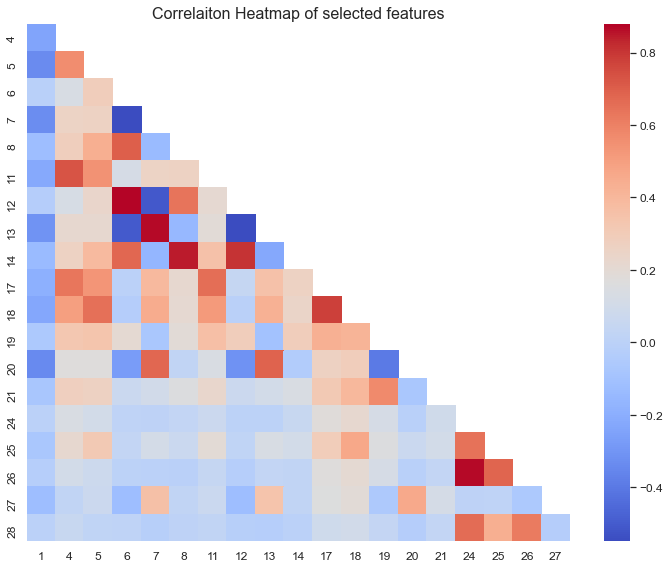

In [125]:
# Review if any potential correlations between attributes
corr_mat = df.iloc[:, x].corr()
mask = np.tril(np.ones_like(corr_mat, dtype = np.bool), k=-1)


plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat.where(mask).iloc[1:,:-1], annot=False, cmap = 'coolwarm')

plt.title('Correlaiton Heatmap of selected features', fontsize=16)
save_fig('correlation_heatmap_select_features')

plt.show()


Saving figure daily_input_flow_to_plant


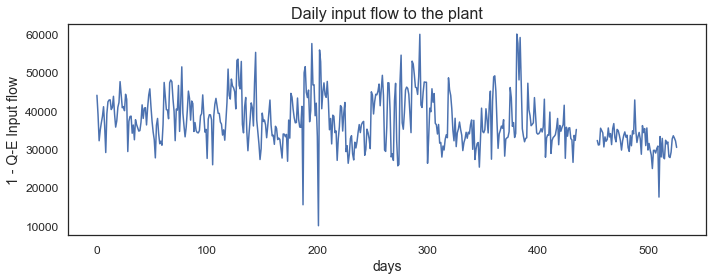

In [126]:
# Line chart of the Input Flow into the plant
plt.figure(figsize=(10,4))
plt.title("Daily input flow to the plant", fontsize=16)
plt.xlabel("days", fontsize=14)
plt.ylabel("1 - Q-E Input flow", fontsize=14)
sns.lineplot(data=df.iloc[:, 1]);
save_fig('daily_input_flow_to_plant')

In [127]:
from sklearn.impute import SimpleImputer

# Replace null values with the mean of the column
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imp.fit_transform(X)


In [128]:
from sklearn.preprocessing import StandardScaler

# Large variation from plant input values to other values, therefore scale all data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [129]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
max_num_clusters = 9 # Assign a number and amend to suit
kmeans_per_k = [KMeans(n_clusters=k, init= 'k-means++', random_state=0).fit(X) 
                for k in range(1,max_num_clusters)]
inertias = [model.inertia_ for model in kmeans_per_k]


Saving figure inertia_vs_k_plot_elblow_plot


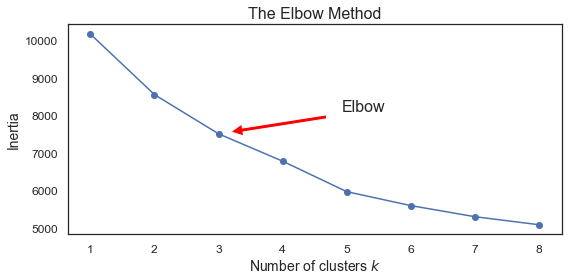

In [130]:
plt.figure(figsize=(8,4))
plt.plot(range(1,max_num_clusters), inertias, "bo-")
plt.title("The Elbow Method", fontsize=16)
plt.xlabel("Number of clusters $k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
elbow_tick = 3  # number of clusters where the elbow is located
plt.annotate("Elbow",
             xy = (elbow_tick, inertias[elbow_tick - 1]),
             xytext = (0.6, 0.6),
             textcoords = 'figure fraction',
             fontsize = 16,
             arrowprops = dict(facecolor='red', shrink=0.1)
            )
save_fig("inertia_vs_k_plot_elblow_plot", transparent_=True)
plt.show()

In [131]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
kmeans_per_k = [KMeans(n_clusters=k, init= 'k-means++', random_state=0).fit(X) 
                for k in range(1,max_num_clusters + 1)]
silhouette_score_per_k = [silhouette_score(X, model.labels_)
                            for model in kmeans_per_k[1:]]

Saving figure silhouette_score_vs_k_plot


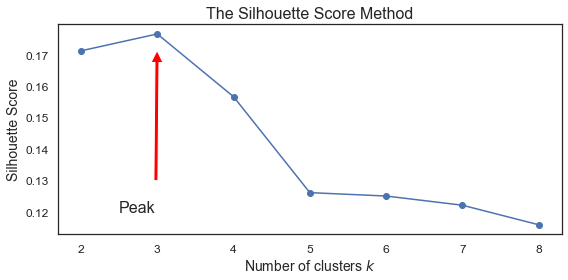

In [132]:
plt.figure(figsize=(8,4))
plt.plot(range(2,max_num_clusters), silhouette_score_per_k[:-1], "bo-")
plt.title('The Silhouette Score Method', fontsize=16)
plt.xlabel("Number of clusters $k$", fontsize=14)
plt.ylabel("Silhouette Score", fontsize=14)
elbow_tick = 3
plt.annotate("Peak",
             xy = (elbow_tick, max(silhouette_score_per_k)),
             xytext = (2.5, 0.12),
             textcoords = 'data',
             fontsize = 16,
             arrowprops = dict(facecolor='red', shrink=0.1)
            )
save_fig("silhouette_score_vs_k_plot")
plt.show()

Saving figure silhouette_analysis_plot


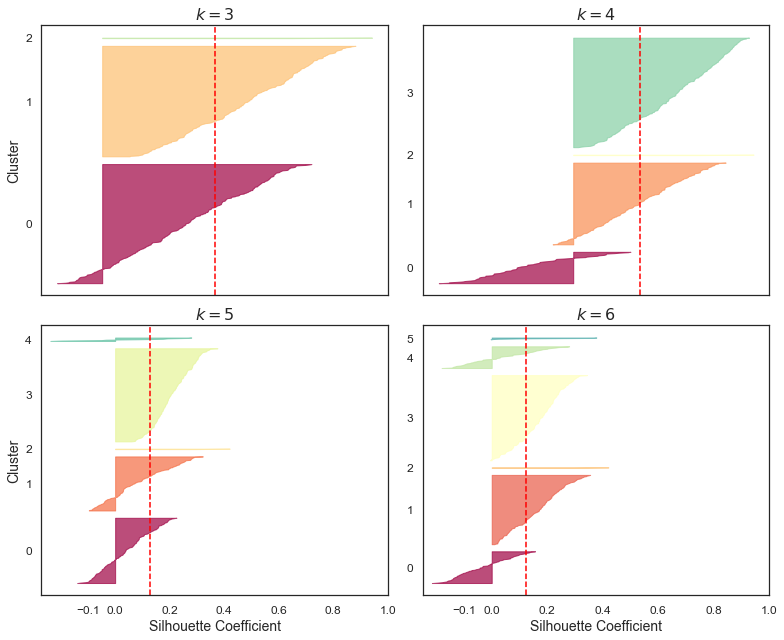

In [133]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_score_per_k[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)


save_fig("silhouette_analysis_plot")
plt.show()

Saving figure dendogram


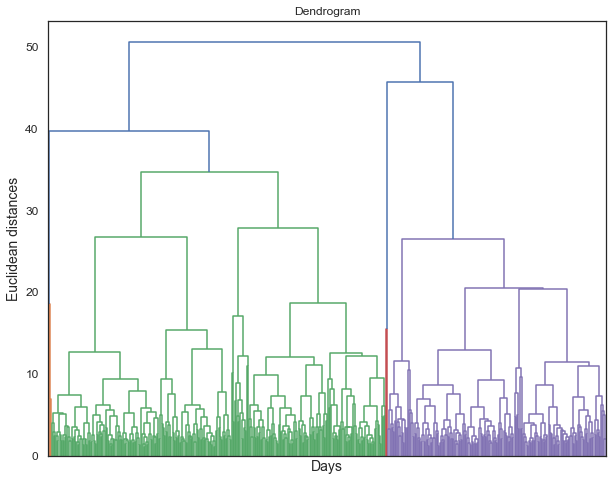

In [134]:
# Using the dendrogram to find the optimal number of clusters
# Measure to find the maximum vertical distance between horizontal
# lines. The highest y value crosses N number of vertical lines = clusters.
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10, 8))

plt.rcParams['axes.grid'] = False
plt.title('Dendrogram')
plt.xlabel('Days')
plt.ylabel('Euclidean distances')
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'), no_labels=True)
save_fig('dendogram', tight_layout=False)
plt.show()


In [135]:
# Training the K-Means model on the dataset

# Review the elbow plot, Silhouette plots, and Dendrogram and set the number of clusters.
n_clusters = 3

kmeans = KMeans(n_clusters= n_clusters, init= 'k-means++', random_state=0).fit(X)
y_kmeans = kmeans.fit_predict(X)

In [136]:
# Training the Hierarchical Clustering model on the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [137]:
# Select those features (columns) which may be useful 
perf = np.r_[30:39]

X_perf = dataset.iloc[:, perf].values
X_perf = imp.fit_transform(X_perf)
X_perf.shape


(509, 9)

In [138]:
column_labels = [str(i) for i in list(x)] + [str(i) for i in list(perf)] + ['39', '40']
column_labels

['1',
 '4',
 '5',
 '6',
 '7',
 '8',
 '11',
 '12',
 '13',
 '14',
 '17',
 '18',
 '19',
 '20',
 '21',
 '24',
 '25',
 '26',
 '27',
 '28',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40']

In [139]:
# Add the Date, KMeans and Agglomerative cluster predictions to the dataset
results = pd.DataFrame(data = np.concatenate(
                (
                # dataset.iloc[:, 0].values.reshape(len(dataset), 1),
                scaler.inverse_transform(X),
                X_perf,
                y_kmeans.reshape(len(y_kmeans), 1),
                y_hc.reshape(len(y_hc), 1)
                ),
                axis=1),
                columns=column_labels,
                dtype='float'
            )#.rename(columns={0: "Date", 39: "y_kmeans", 40:"y_hc"})

In [140]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       509 non-null    float64
 1   4       509 non-null    float64
 2   5       509 non-null    float64
 3   6       509 non-null    float64
 4   7       509 non-null    float64
 5   8       509 non-null    float64
 6   11      509 non-null    float64
 7   12      509 non-null    float64
 8   13      509 non-null    float64
 9   14      509 non-null    float64
 10  17      509 non-null    float64
 11  18      509 non-null    float64
 12  19      509 non-null    float64
 13  20      509 non-null    float64
 14  21      509 non-null    float64
 15  24      509 non-null    float64
 16  25      509 non-null    float64
 17  26      509 non-null    float64
 18  27      509 non-null    float64
 19  28      509 non-null    float64
 20  30      509 non-null    float64
 21  31      509 non-null    float64
 22  32

In [141]:
# Change the object types back to float
# for c in range(1, len(results.columns)):
#     results[c] = results[c].astype('float')


In [142]:
# K-Means Value Counts
results['39'].value_counts()

0.0    263
1.0    244
2.0      2
Name: 39, dtype: int64

In [143]:
# Hierarchical Clustering Value Counts
results['40'].value_counts()

0.0    308
1.0    199
2.0      2
Name: 40, dtype: int64

In [144]:
# Clusting numbering predictions are random, therefore
# remap to assign both algorithms to cluster numbers based on value counts for 
# ease of comparison. 
y_kmeans_cluster_remap = {0:3, 1:2, 2:1}
y_hc_cluster_remap = {0:3, 1:2, 2:1}

results['39'] = results['39'].map(y_kmeans_cluster_remap)
results['40'] = results['40'].map(y_hc_cluster_remap)

In [145]:
# Confirm Agglomerative cluster 0 is for the smaller cluster size up to 2 for the largest cluster size
# inline with K-means value counts.
results['39'].value_counts()


3    263
2    244
1      2
Name: 39, dtype: int64

In [146]:
results['40'].value_counts()

3    308
2    199
1      2
Name: 40, dtype: int64

Saving figure scatterplot_cod_perf_input_clusters


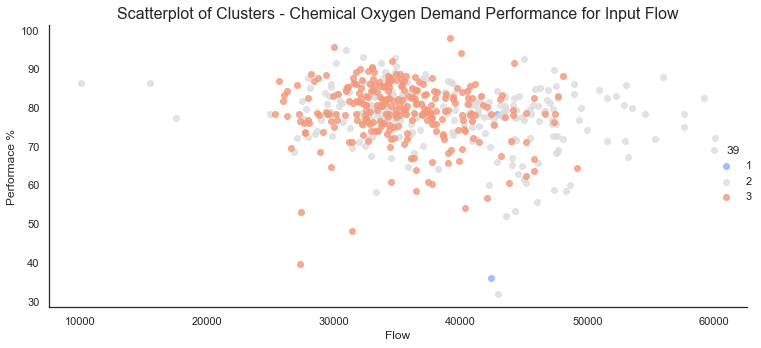

In [147]:
# Create a copy of the results dataset to work with
df_r = results.copy()

# Assign columns from RangeIndex to string as lmplot can only accept string values for column names
df_r.columns = df_r.columns.astype(str)
sns.set()

sns.set_style(style="white")

g = sns.lmplot("1", "36", data=df_r, hue="39", palette='coolwarm', height=5, aspect=2, fit_reg=False)
g = (g.set_axis_labels("Flow", "Performace %"))
plt.title("Scatterplot of Clusters - Chemical Oxygen Demand Performance for Input Flow", 
            fontsize=16)
save_fig('scatterplot_cod_perf_input_clusters')

In [148]:
dataset.describe().T.style.format('{0:,.1f}')

,count,mean,std,min,25%,50%,75%,max
1,509.0,"37,226.6","6,636.0","10,050.0","32,888.0","35,990.0","41,372.0","60,081.0"
2,506.0,2.4,2.8,0.1,0.9,1.5,3.0,33.5
3,509.0,7.8,0.2,7.2,7.7,7.8,8.0,8.7
4,486.0,189.5,62.8,31.0,147.0,183.0,224.0,438.0
5,503.0,406.9,121.0,81.0,325.0,400.0,478.0,941.0
6,508.0,228.1,138.0,98.0,170.0,196.0,242.0,"2,008.0"
7,498.0,61.3,12.6,13.2,55.7,64.3,69.9,85.0
8,484.0,4.6,2.8,0.4,3.1,4.5,5.5,36.0
9,509.0,"1,476.2",397.0,651.0,"1,200.0","1,403.0","1,672.0","3,230.0"
10,509.0,7.8,0.2,7.3,7.7,7.8,8.0,8.5


In [149]:
agg_func = {'1' : ['count', 'mean', 'std'], '35': ['mean', 'std'], '36': ['mean', 'std']}
df_r.groupby(['39']).agg(agg_func).style.format('{0:,.2f}')

In [150]:
agg_func = {'1' : ['count', 'mean', 'std'], '35': ['mean', 'std'], '36': ['mean', 'std']}
df_r.groupby(['40']).agg(agg_func).style.format('{0:,.2f}')

Saving figure kmeans_clusters_3_input_flow_and_zinc_to_the_plant
Saving figure agglomerative_clusters_3_input_flow_and_zinc_to_the_plant


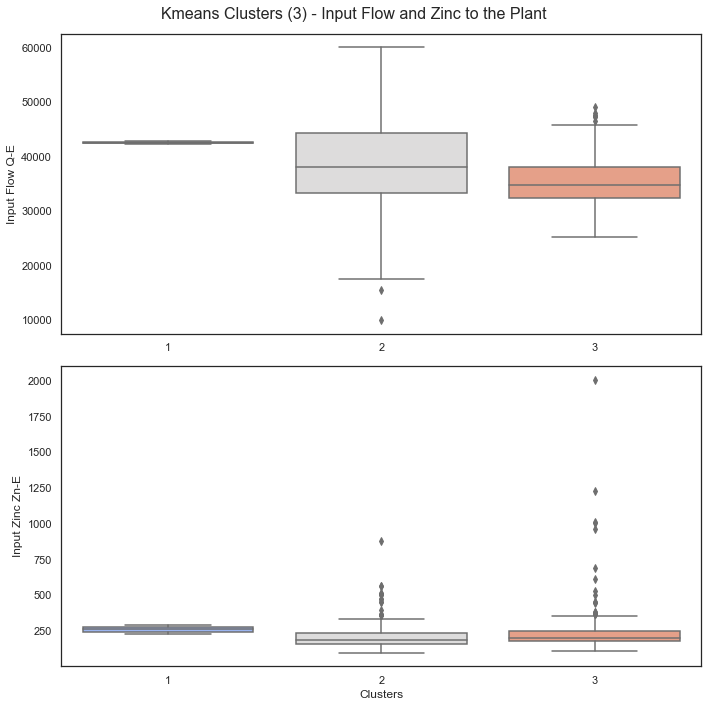

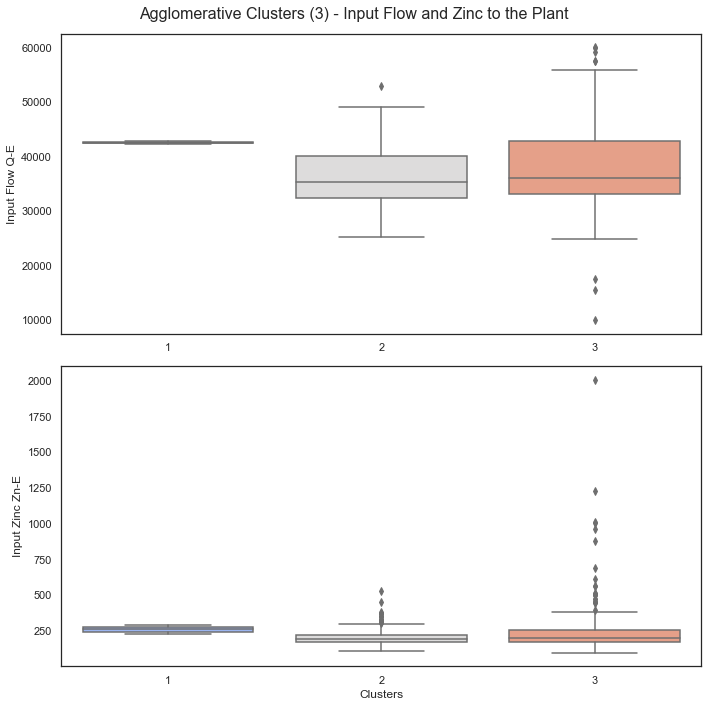

In [151]:
x_data_dict = {39: ['39', 'Kmeans'] , 40: ['40', 'Agglomerative']}
y_data = ['1', '6']

def fn_boxplot(x_data_id, y_data_id=0, data=df_r, palette='coolwarm'):
    return sns.boxplot(x= x_data_dict.get(x_data_id)[0],
             y= y_data[y_data_id], data=data, palette=palette)

def fn_boxplot_grid(x_data_id=39):
    plt.rcParams['axes.grid'] = False
    fig = plt.figure(figsize=(10, 10))
    
    sup_title = f"{x_data_dict.get(x_data_id)[1]} Clusters ({n_clusters}) - "\
    "Input Flow and Zinc to the Plant"
    fig_name = (sup_title.lower().replace("(","").replace(")", "").replace("-", "").replace("  ", " ").replace(" ", "_").strip())
    fig.suptitle(sup_title, fontsize=16)

    ax1 = plt.subplot(211)
    fn_boxplot(x_data_id = x_data_id, y_data_id = 0)
    ax1.set_ylabel("Input Flow Q-E")
    ax1.set_xlabel("")
    
    ax2 = plt.subplot(212)
    fn_boxplot(x_data_id = x_data_id, y_data_id = 1)
    ax2.set_ylabel("Input Zinc Zn-E")
    ax2.set_xlabel("Clusters")
    plt.rcParams['axes.grid'] = True
    plt.tight_layout()
    save_fig(fig_name)

fn_boxplot_grid(x_data_id = 39)
fn_boxplot_grid(x_data_id = 40)

Saving figure kmeans_clusters_3_suspended_solids_from_influent_to_effluent
Saving figure agglomerative_clusters_3_suspended_solids_from_influent_to_effluent


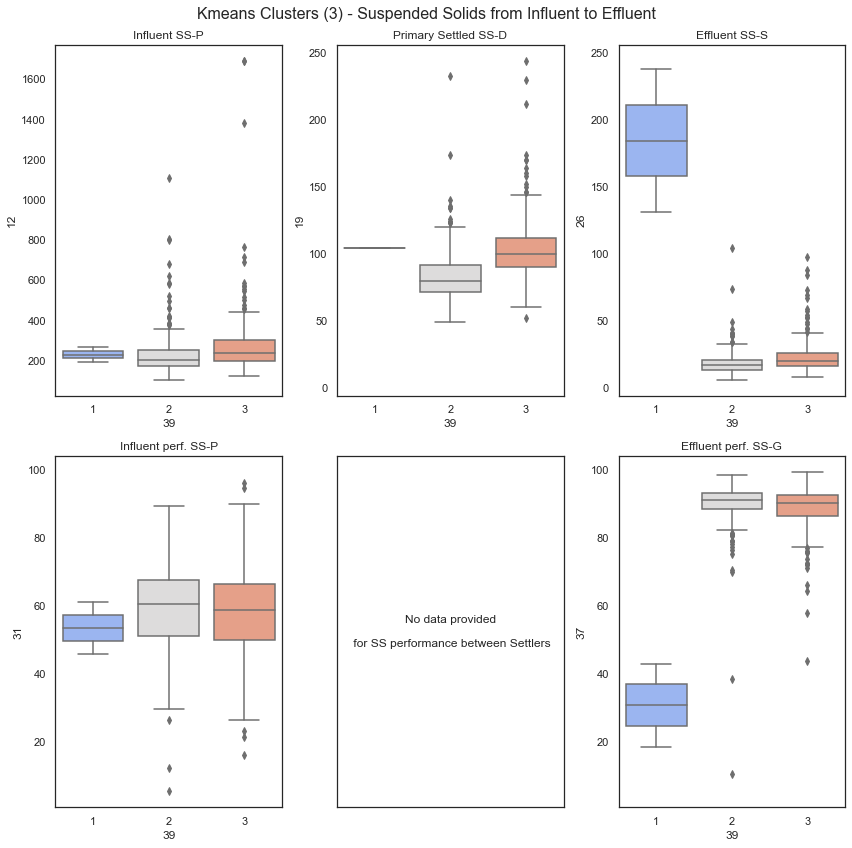

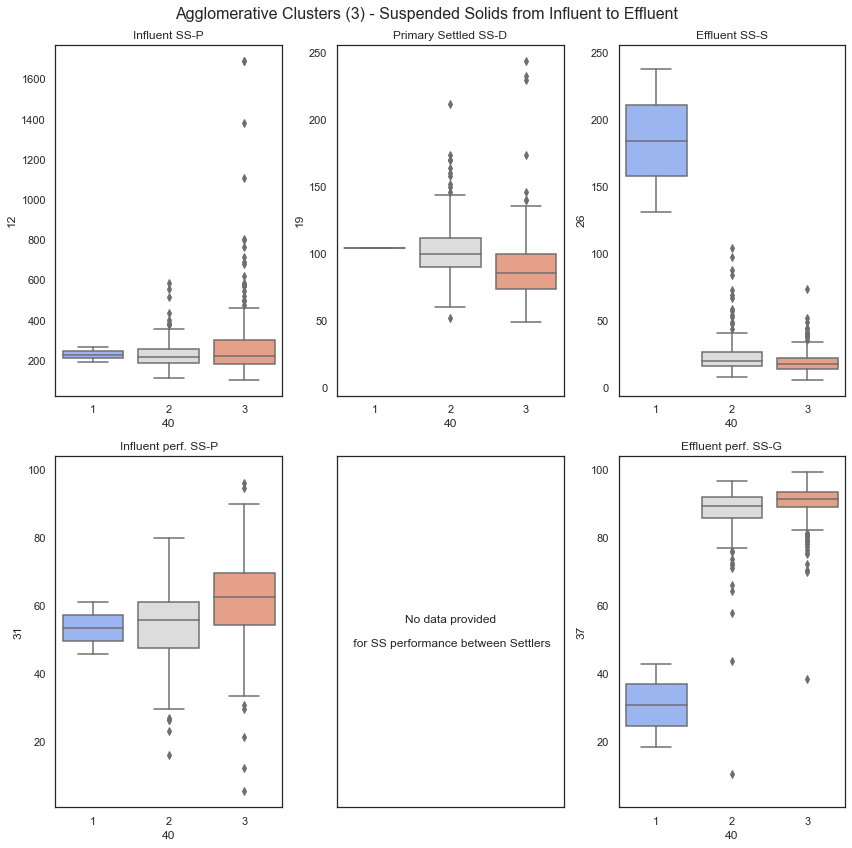

In [152]:
y_data = ['12', '19', '26', '31', '31', '37']

def fn_boxplot(x_data_id, y_data_id=0, data=df_r, palette='coolwarm'):
    return sns.boxplot(x= x_data_dict.get(x_data_id)[0],
             y= y_data[y_data_id], data=data, palette=palette)

def fn_boxplot_grid(x_data_id=39):
    fig = plt.figure(figsize=(12, 12))
    plt.rcParams['axes.grid'] = False

    sup_title = (f"{x_data_dict.get(x_data_id)[1]} Clusters ({n_clusters}) - " \
    "Suspended Solids from Influent to Effluent")
    fig_name = (sup_title.lower().replace("(","").replace(")", "").replace("-", "").replace("  ", " ").replace(" ", "_").strip())
    fig.suptitle(sup_title, fontsize=16)

    ax1 = plt.subplot(231)
    ax1.set_title("Influent SS-P")
    fn_boxplot(x_data_id = x_data_id, y_data_id = 0)
    

    ax2 = plt.subplot(232)
    ax2.set_title("Primary Settled SS-D")
    fn_boxplot(x_data_id = x_data_id, y_data_id = 1)
    

    ax3 = plt.subplot(233, sharey=ax2)
    ax3.set_title("Effluent SS-S")
    fn_boxplot(x_data_id = x_data_id, y_data_id = 2)

    ax4 = plt.subplot(234)
    ax4.set_title("Influent perf. SS-P")
    fn_boxplot(x_data_id = x_data_id, y_data_id = 3)

    ax5 = plt.subplot(235, xticks=[], yticks=[])
    ax5.text(0.5, 0.5, "No data provided\n\n for SS performance between Settlers", 
            horizontalalignment='center', verticalalignment='center')

    ax6 = plt.subplot(236, sharey=ax4)
    ax6.set_title("Effluent perf. SS-G")
    fn_boxplot(x_data_id = x_data_id, y_data_id = 5)

    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.2,
                        wspace=0.3)
    plt.tight_layout()
    save_fig(fig_name)
    plt.rcParams['axes.grid'] = True


fn_boxplot_grid(x_data_id = 39)
fn_boxplot_grid(x_data_id = 40)

Saving figure kmeans_clusters_3_biological_oxygen_demand_from_influent_to_effluent
Saving figure agglomerative_clusters_3_biological_oxygen_demand_from_influent_to_effluent


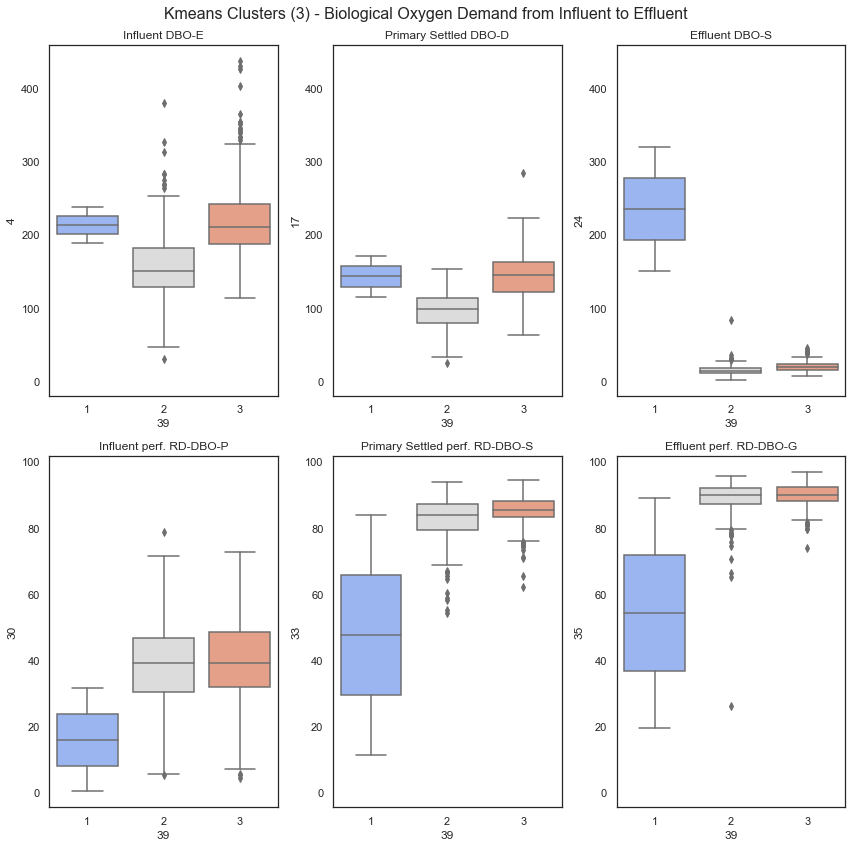

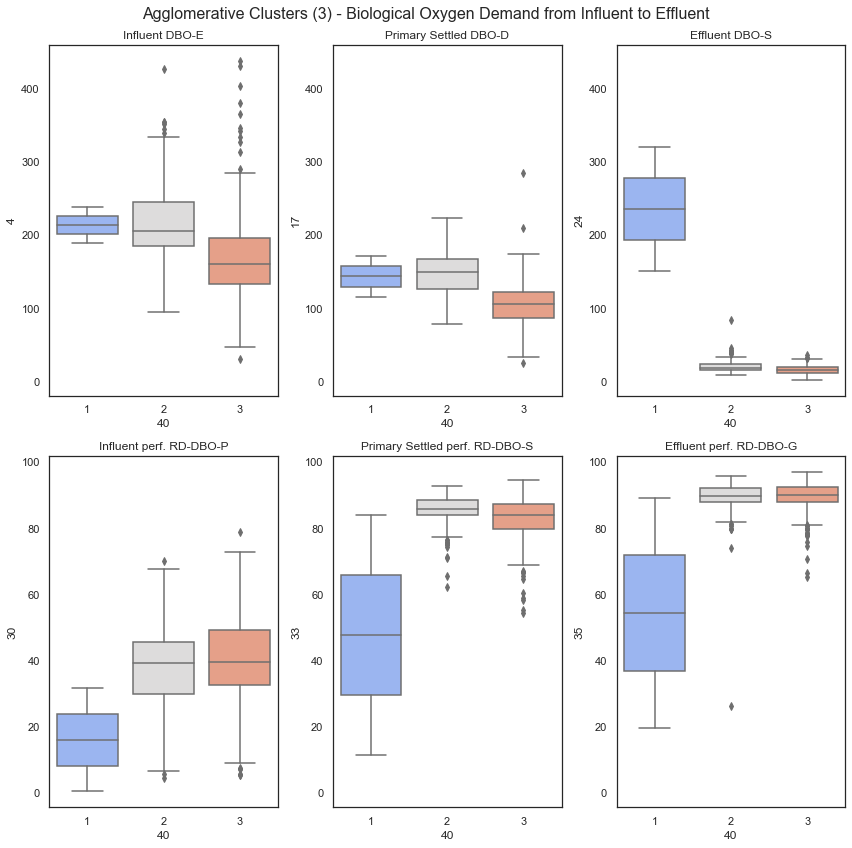

In [153]:
y_data = ['4', '17', '24', '30', '33', '35']

def fn_boxplot(x_data_id, y_data_id=0, data=df_r, palette='coolwarm'):
    return sns.boxplot(x= x_data_dict.get(x_data_id)[0],
             y= y_data[y_data_id], data=data, palette=palette)

def fn_boxplot_grid(x_data_id=39):
    plt.rcParams['axes.grid'] = False
    fig = plt.figure(figsize=(12, 12))
    
    sup_title = f"{x_data_dict.get(x_data_id)[1]} Clusters ({n_clusters}) - " \
    "Biological Oxygen Demand from Influent to Effluent"
    fig_name = (sup_title.lower().replace("(","").replace(")", "").replace("-", "").replace("  ", " ").replace(" ", "_").strip())
    fig.suptitle(sup_title, fontsize=16)

    ax1 = plt.subplot(231)
    
    ax1.set_title("Influent DBO-E")
    fn_boxplot(x_data_id = x_data_id, y_data_id = 0)

    ax2 = plt.subplot(232, sharey=ax1)
    ax2.set_title("Primary Settled DBO-D")
    fn_boxplot(x_data_id = x_data_id, y_data_id = 1)

    ax3 = plt.subplot(233, sharey=ax1)
    ax3.set_title("Effluent DBO-S")
    fn_boxplot(x_data_id = x_data_id, y_data_id = 2)

    ax4 = plt.subplot(234)
    ax4.set_title("Influent perf. RD-DBO-P")
    fn_boxplot(x_data_id = x_data_id, y_data_id = 3)

    ax5 = plt.subplot(235, sharey=ax4)
    ax5.set_title("Primary Settled perf. RD-DBO-S")
    fn_boxplot(x_data_id = x_data_id, y_data_id = 4)

    ax6 = plt.subplot(236, sharey=ax4)
    ax6.set_title("Effluent perf. RD-DBO-G")
    fn_boxplot(x_data_id = x_data_id, y_data_id = 5)

    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.2,
                        wspace=0.3)
    plt.tight_layout()
    save_fig(fig_name)
    plt.rcParams['axes.grid'] = True


fn_boxplot_grid(x_data_id = 39)
fn_boxplot_grid(x_data_id = 40)

Saving figure kmeans_clusters_3_chemical_oxygen_demand_from_influent_to_effluent
Saving figure agglomerative_clusters_3_chemical_oxygen_demand_from_influent_to_effluent


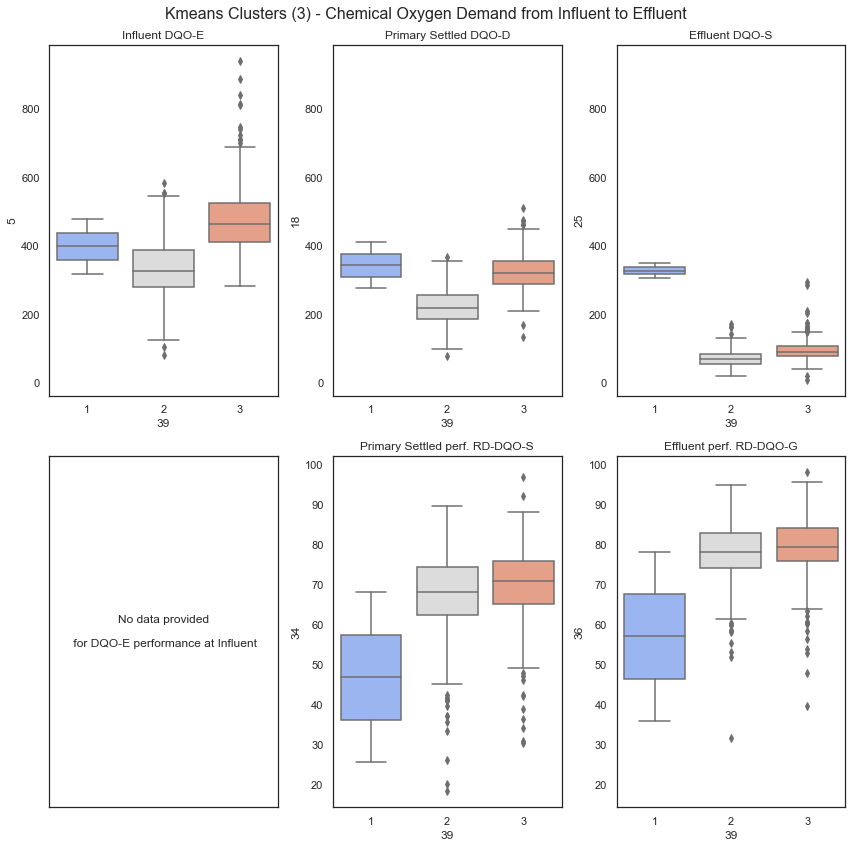

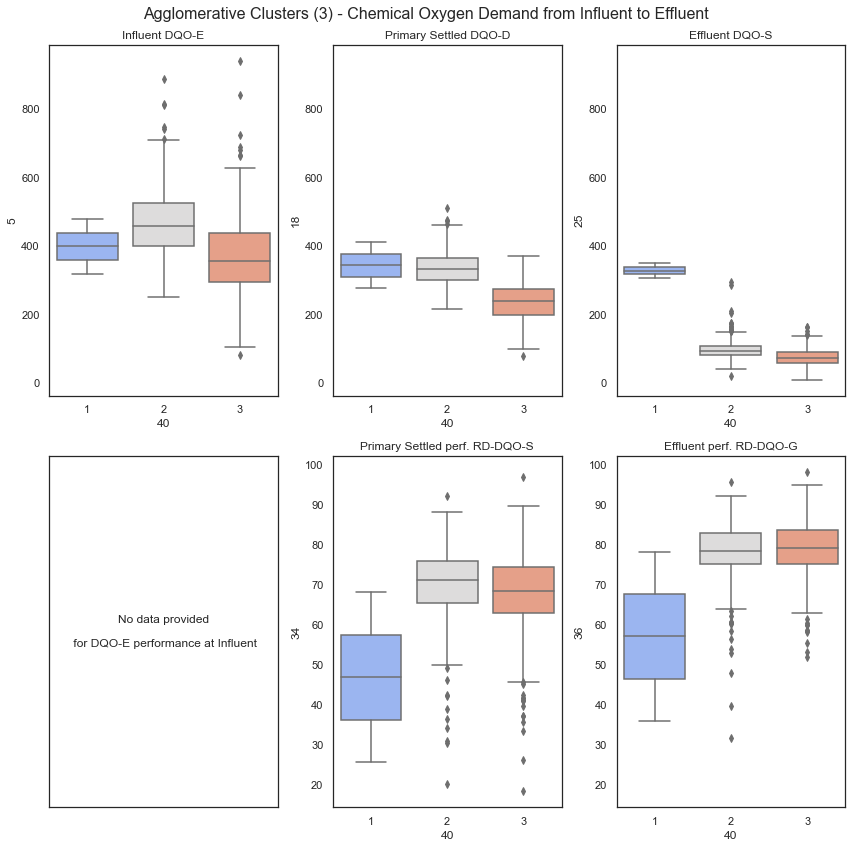

In [154]:
y_data = ['5', '18', '25', '', '34', '36']

def fn_boxplot(x_data_id, y_data_id=0, data=df_r, palette='coolwarm'):
    return sns.boxplot(x= x_data_dict.get(x_data_id)[0],
             y= y_data[y_data_id], data=data, palette=palette)

def fn_boxplot_grid(x_data_id=39):
    fig = plt.figure(figsize=(12, 12))
    plt.rcParams['axes.grid'] = False



    sup_title = (f"{x_data_dict.get(x_data_id)[1]} Clusters ({n_clusters}) - " \
    "Chemical Oxygen Demand from Influent to Effluent")
    fig_name = (sup_title.lower().replace("(","").replace(")", "").replace("-", "").replace("  ", " ").replace(" ", "_").strip())
    fig.suptitle(sup_title, fontsize=16)

    ax1 = plt.subplot(231)
    ax1.set_title("Influent DQO-E")
    fn_boxplot(x_data_id = x_data_id, y_data_id = 0)

    ax2 = plt.subplot(232, sharey=ax1)
    ax2.set_title("Primary Settled DQO-D")
    fn_boxplot(x_data_id = x_data_id, y_data_id = 1)

    ax3 = plt.subplot(233, sharey=ax1)
    ax3.set_title("Effluent DQO-S")
    fn_boxplot(x_data_id = x_data_id, y_data_id = 2)

    ax4 = plt.subplot(234, xticks=[], yticks=[])
    
    ax4.text(0.5, 0.5, "No data provided\n\n for DQO-E performance at Influent", 
            horizontalalignment='center', verticalalignment='center')

    ax5 = plt.subplot(235)
    ax5.set_title("Primary Settled perf. RD-DQO-S")
    fn_boxplot(x_data_id = x_data_id, y_data_id = 4)

    ax6 = plt.subplot(236, sharey=ax5)
    ax6.set_title("Effluent perf. RD-DQO-G")
    fn_boxplot(x_data_id = x_data_id, y_data_id = 5)

    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.2,
                        wspace=0.3)
    plt.tight_layout()
    save_fig(fig_name)
    plt.rcParams['axes.grid'] = True


fn_boxplot_grid(x_data_id = 39)
fn_boxplot_grid(x_data_id = 40)

Saving figure kmeans_clusters_3_sediments_from_influent_to_effluent
Saving figure agglomerative_clusters_3_sediments_from_influent_to_effluent


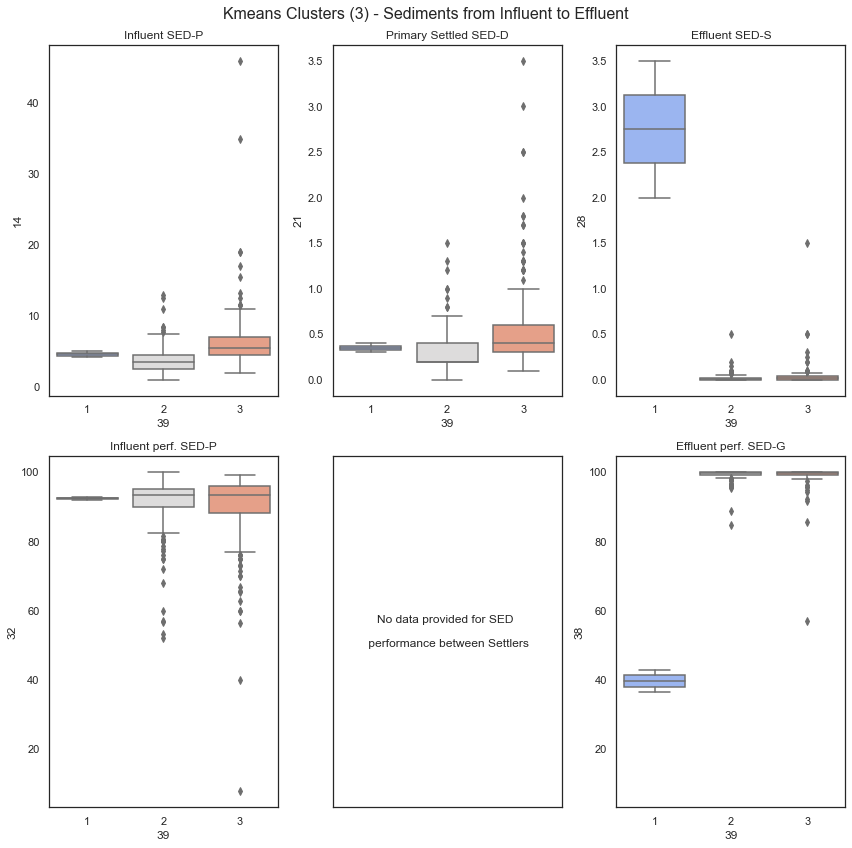

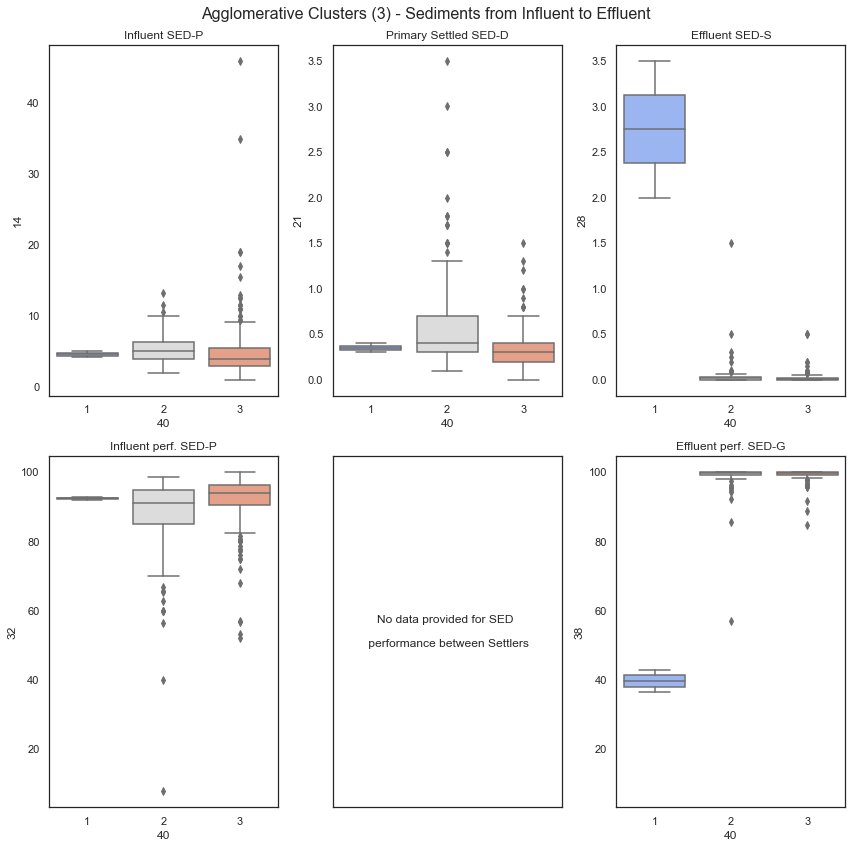

In [155]:
y_data = ['14', '21', '28', '32', '32', '38']

def fn_boxplot(x_data_id, y_data_id=0, data=df_r, palette='coolwarm'):
    return sns.boxplot(x= x_data_dict.get(x_data_id)[0],
             y= y_data[y_data_id], data=data, palette=palette)

def fn_boxplot_grid(x_data_id=39):
    fig = plt.figure(figsize=(12, 12))
    plt.rcParams['axes.grid'] = False

    sup_title = f"{x_data_dict.get(x_data_id)[1]} Clusters ({n_clusters}) - " \
    "Sediments from Influent to Effluent"
    fig_name = (sup_title.lower().replace("(","").replace(")", "").replace("-", "").replace("  ", " ").replace(" ", "_").strip())
    fig.suptitle(sup_title, fontsize=16)

    ax1 = plt.subplot(231)
    ax1.set_title("Influent SED-P")
    fn_boxplot(x_data_id = x_data_id, y_data_id = 0)

    ax2 = plt.subplot(232)
    ax2.set_title("Primary Settled SED-D")
    fn_boxplot(x_data_id = x_data_id, y_data_id = 1)

    ax3 = plt.subplot(233, sharey=ax2)
    ax3.set_title("Effluent SED-S")
    fn_boxplot(x_data_id = x_data_id, y_data_id = 2)

    ax4 = plt.subplot(234)
    ax4.set_title("Influent perf. SED-P")
    fn_boxplot(x_data_id = x_data_id, y_data_id = 3)

    ax5 = plt.subplot(235, xticks=[], yticks=[])
    ax5.text(0.5, 0.5, "No data provided for SED \n\n performance between Settlers", 
            horizontalalignment='center', verticalalignment='center')

    ax6 = plt.subplot(236, sharey=ax4)
    ax6.set_title("Effluent perf. SED-G")
    fn_boxplot(x_data_id = x_data_id, y_data_id = 5)

    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.2,
                        wspace=0.3)
    plt.tight_layout()
    save_fig(fig_name)
    plt.rcParams['axes.grid'] = True


fn_boxplot_grid(x_data_id = 39)
fn_boxplot_grid(x_data_id = 40)